# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.



Model: Logistic Regression
Accuracy: 0.9752
Precision: 0.9706
Recall: 0.9625
F1 Score: 0.9665
Confusion Matrix:
[[2782   49]
 [  63 1616]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2831
           1       0.97      0.96      0.97      1679

    accuracy                           0.98      4510
   macro avg       0.97      0.97      0.97      4510
weighted avg       0.98      0.98      0.98      4510


Model: Random Forest
Accuracy: 0.9865
Precision: 0.9897
Recall: 0.9738
F1 Score: 0.9817
Confusion Matrix:
[[2814   17]
 [  44 1635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2831
           1       0.99      0.97      0.98      1679

    accuracy                           0.99      4510
   macro avg       0.99      0.98      0.99      4510
weighted avg       0.99      0.99      0.99      4510


Model: XGBoost
Accuracy: 

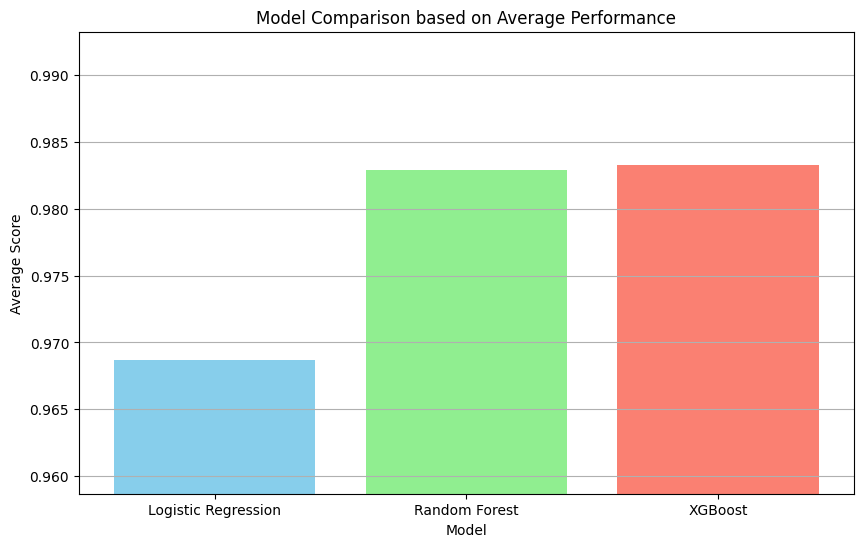

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Data Preprocessing

# Load the dataset
df = pd.read_csv('Data.csv', low_memory=False)

# Replace '?' with NaN and convert to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

# Drop rows with any NaN values
df.dropna(inplace=True)

# Encode the target labels ('S' and 'B')
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # 'S' -> 1, 'B' -> 0

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Model Development

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'Classification Report': classification_report(y_test, y_pred)
    }

# 3. Model Comparison

# Display comparison results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("Classification Report:")
    print(metrics['Classification Report'])

# 4. Graphical Comparison

# Prepare data for plotting
model_names = list(results.keys())
average_scores = [(results[model]['Accuracy'] + results[model]['Precision'] + results[model]['Recall'] + results[model]['F1 Score']) / 4 for model in model_names]
colors = ['skyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(10,6))
plt.bar(model_names, average_scores, color=colors)
plt.title('Model Comparison based on Average Performance')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.ylim(min(average_scores) - 0.01, max(average_scores) + 0.01)
plt.grid(axis='y')
plt.show()


**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.